In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
import scipy.signal as sps
import heartpy as hp
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
from wuvars.data.photometry import load_wserv_v2, group_wserv_v2


In [59]:
from wuvars.analysis.detrending import poly_detrend, visualize_detrending
from wuvars.plotting.lightcurve import simple_phased_lc_scatter_gridspec
import wuvars.analysis.detrending
import importlib
importlib.reload(wuvars.analysis.detrending)

<module 'wuvars.analysis.detrending' from '/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/detrending.py'>

In [3]:
# pick out which ones need followup

spreadsheet_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes"
period_sheet_ngc = pd.read_excel(
    os.path.join(spreadsheet_dir, "NGC_source_properties_periods_inspected.xlsx")
)

followup_ngc = period_sheet_ngc[(period_sheet_ngc["Periodic?"] == "Yf") | (period_sheet_ngc["Periodic?"] == "?f")]

len(followup_ngc)

ngc_date_offset = 56141
ngc_start = 0
ngc_end = np.inf

ngc_dat = group_wserv_v2(load_wserv_v2(7))



Loading WSERV7 photometry data... DONE (elapsed time: 0.20s)


In [4]:
print(followup_ngc)

    index        SOURCEID          shortname A/S/C     RA_deg     DE_deg  \
3       3  44508746098719   ngc_003A_M8.0_Q0     A  52.129572  31.284470   
12     12  44508746098403   ngc_012C_M8.2_Q2     C  52.197261  31.191635   
19     19  44508746107325   ngc_019C_M7.5_Q2     C  52.217221  31.263107   
23     23  44508746116168  ngc_023A_M6.0_Q1J     A  52.229011  31.304272   
28     28  44508746116243   ngc_028C_M6.5_Q2     C  52.237233  31.346857   
34     34  44508746116314   ngc_034A_M8.0_Q0     A  52.242710  31.367268   
55     55  44508746116731   ngc_055C_M7.8_Q2     C  52.279843  31.389678   
60     60  44508746116800   ngc_060C_M5.5_Q2     C  52.288870  31.351150   
68     68  44508746116914   ngc_068C_M4.5_Q2     C  52.298516  31.343745   
72     72  44508746116994   ngc_072C_M5.2_Q2     C  52.303789  31.391498   
73     73  44508746116999   ngc_073C_M7.5_Q2     C  52.304337  31.293970   
82     82  44508746117406   ngc_082C_M4.8_Q2     C  52.346485  31.341754   
85     85  4

In [5]:
followup_sourceids = followup_ngc['SOURCEID']
followup_status = followup_ngc['Periodic?']
print(followup_sourceids)

3     44508746098719
12    44508746098403
19    44508746107325
23    44508746116168
28    44508746116243
34    44508746116314
55    44508746116731
60    44508746116800
68    44508746116914
72    44508746116994
73    44508746116999
82    44508746117406
85    44508746117427
92    44508746117569
93    44508746117584
Name: SOURCEID, dtype: int64


In [6]:
for sid, status in zip(followup_sourceids, followup_status):
    print(sid, status)

44508746098719 Yf
44508746098403 Yf
44508746107325 Yf
44508746116168 Yf
44508746116243 Yf
44508746116314 Yf
44508746116731 Yf
44508746116800 Yf
44508746116914 Yf
44508746116994 Yf
44508746116999 Yf
44508746117406 Yf
44508746117427 Yf
44508746117569 Yf
44508746117584 Yf


44508746117584
J period: 2.51
H period: 2.52
K period: 2.51


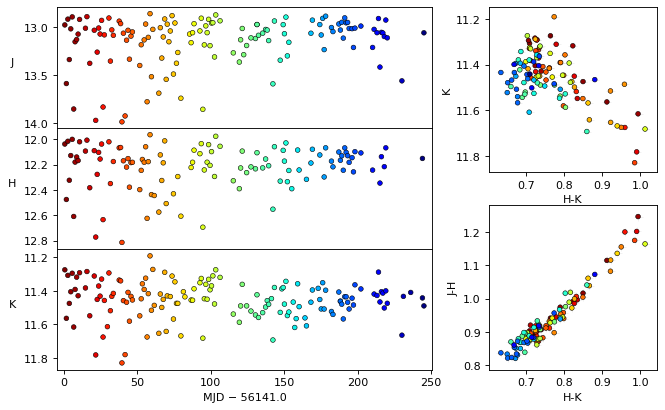

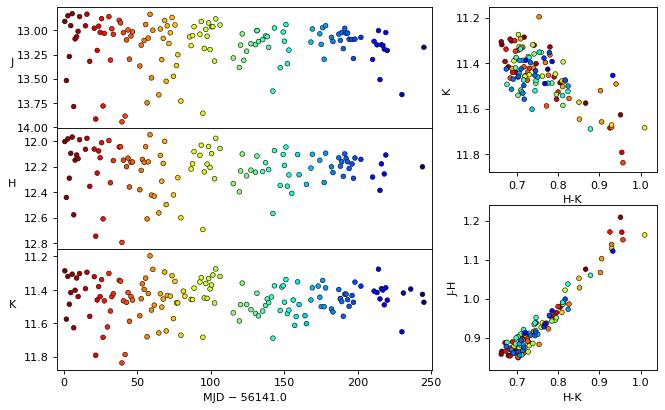

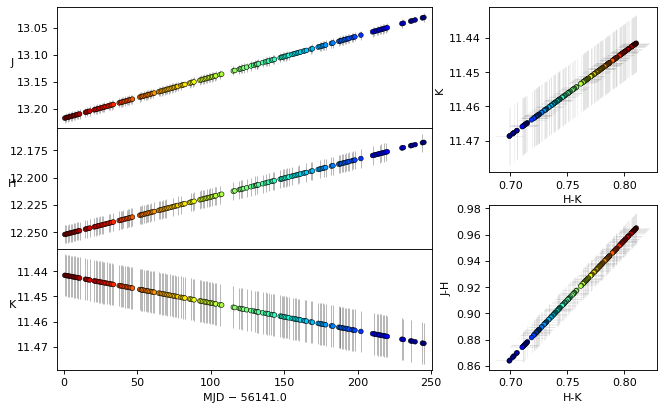

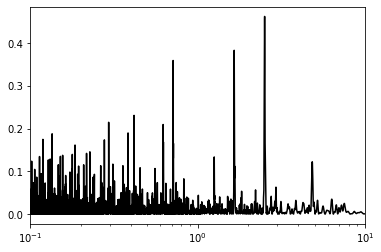

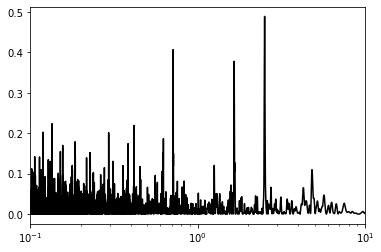

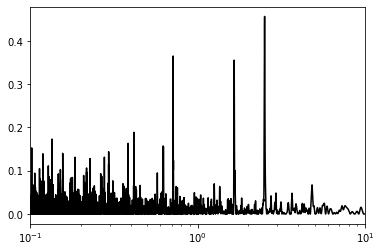

In [7]:
print(sid)
visualize_detrending(sid, ngc_dat, ngc_date_offset, simple_breaks=[])

3 44508746098719

J period: 0.93
H period: 0.93
K period: 0.93


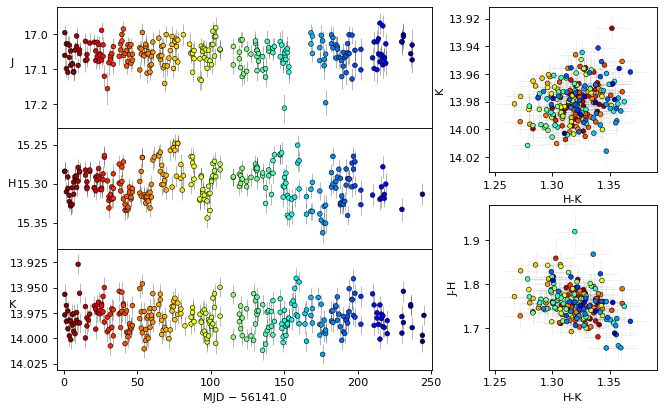

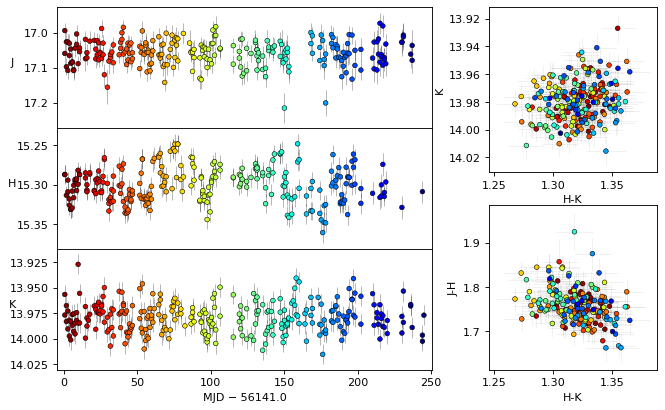

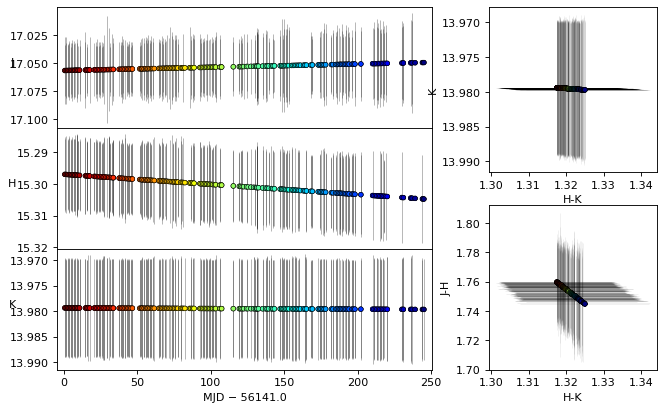

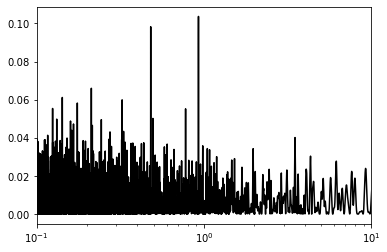

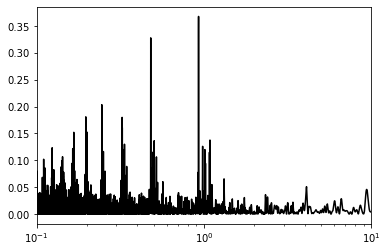

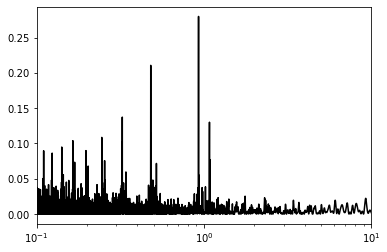





****************************************************************************
12 44508746098403

J period: 4.11
H period: 4.11
K period: 4.10


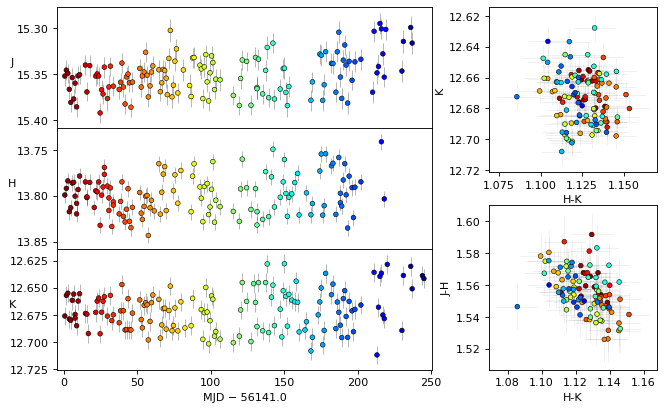

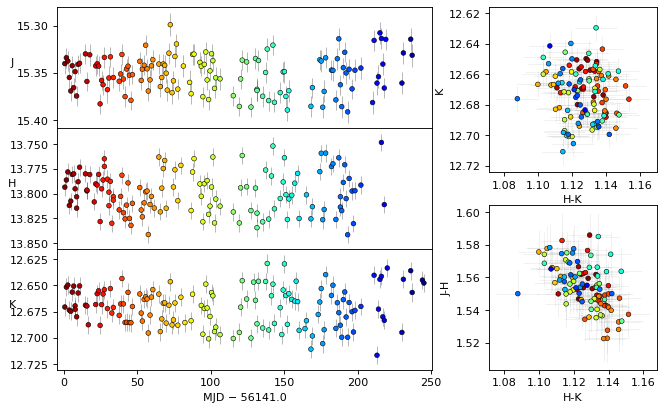

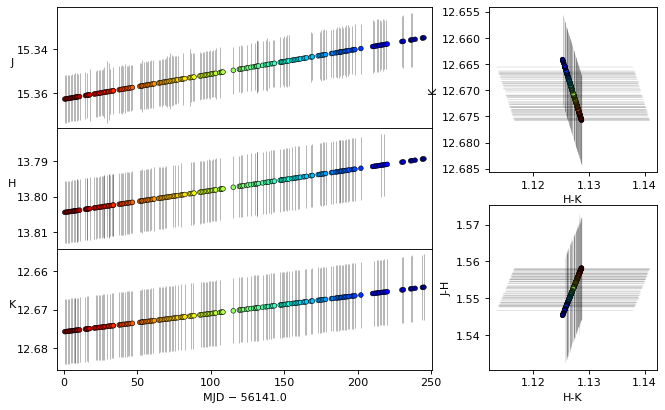

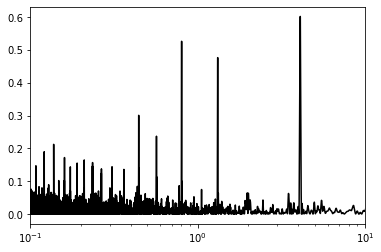

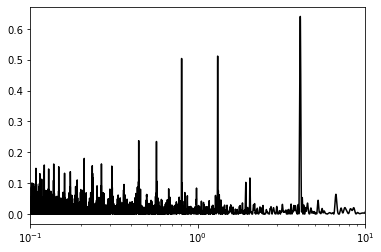

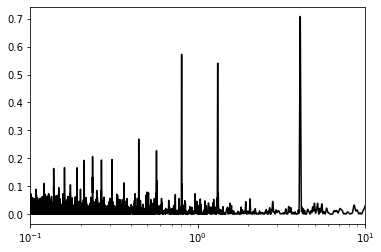





****************************************************************************
19 44508746107325

J period: 0.06
H period: 2.28
K period: 2.28


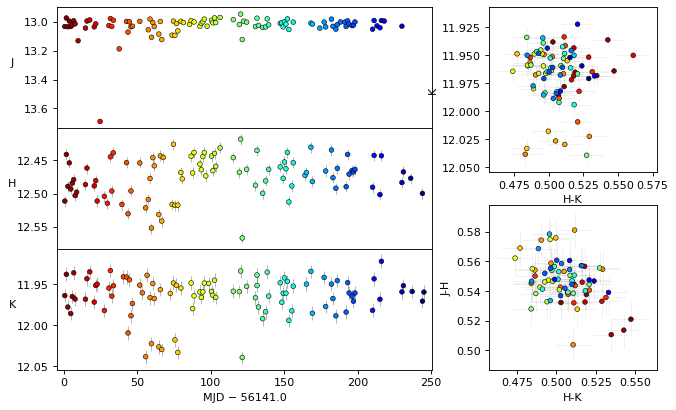

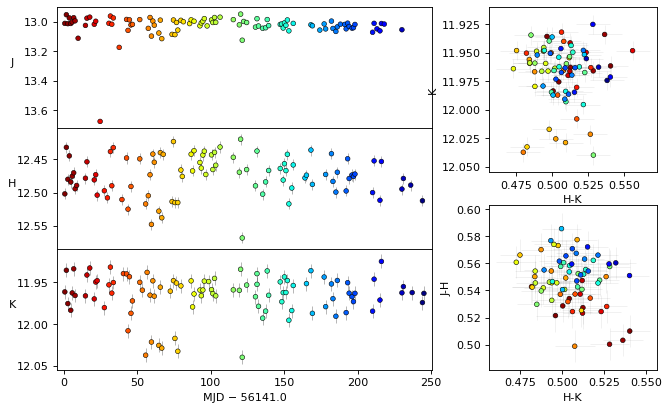

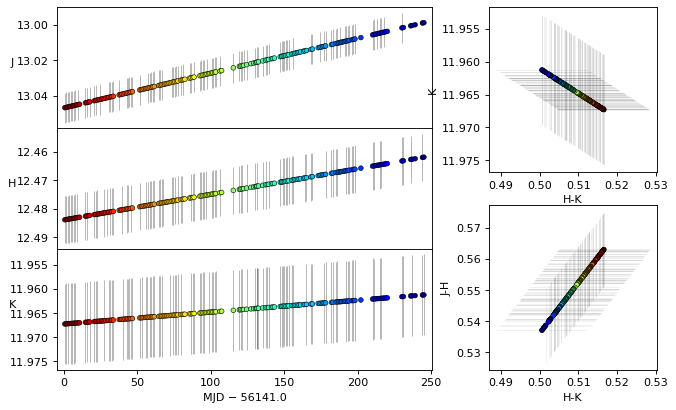

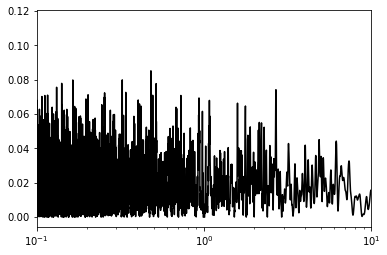

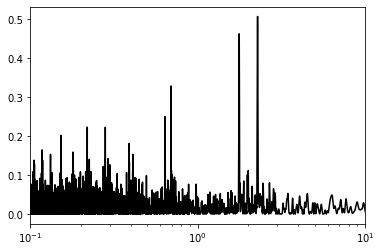

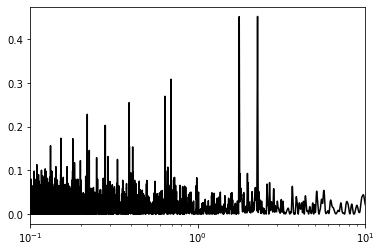





****************************************************************************
23 44508746116168

J period: 0.09
H period: 1.36
K period: 1.36


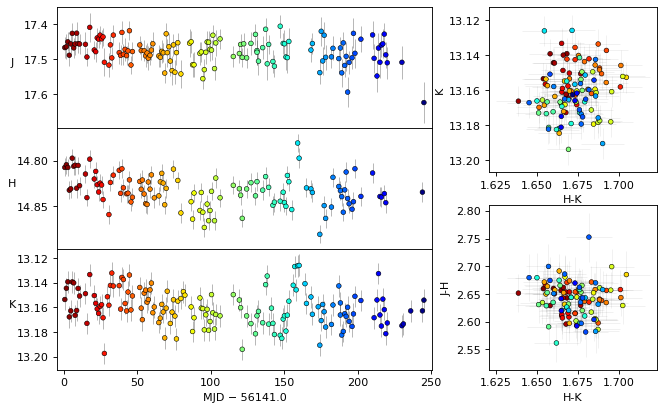

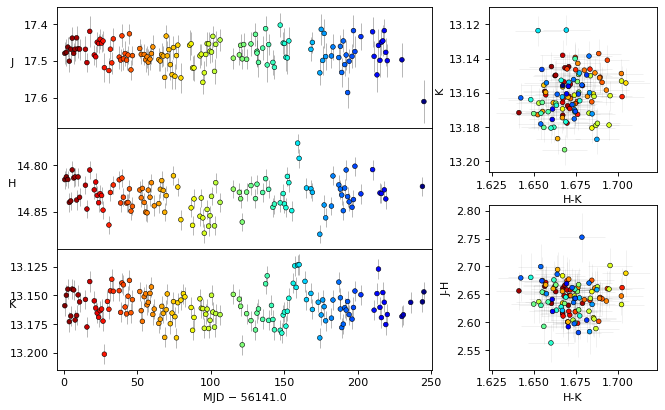

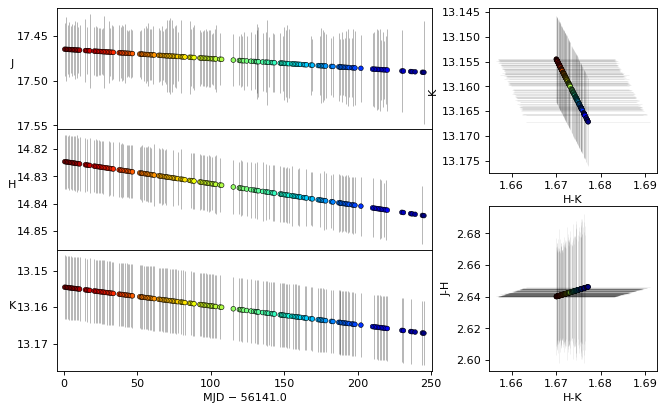

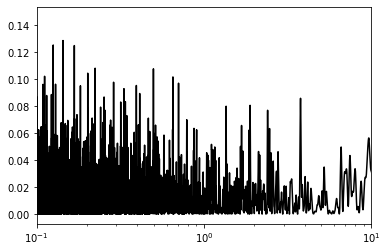

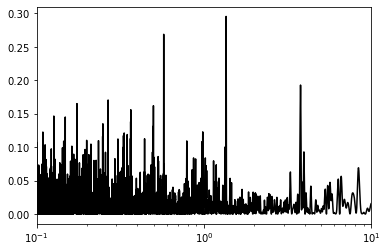

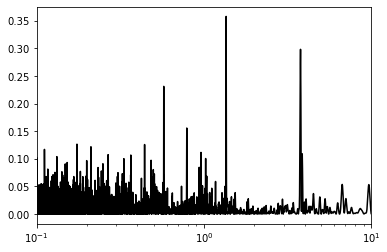





****************************************************************************
28 44508746116243

J period: 1.41
H period: 3.44
K period: 3.44


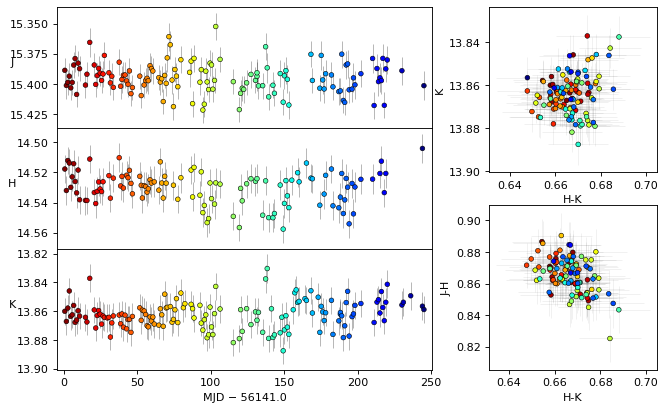

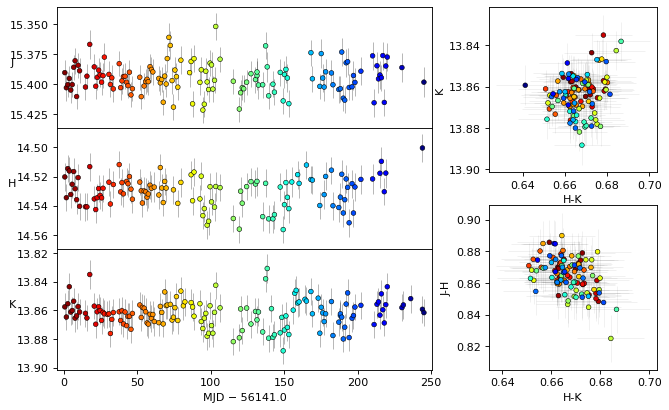

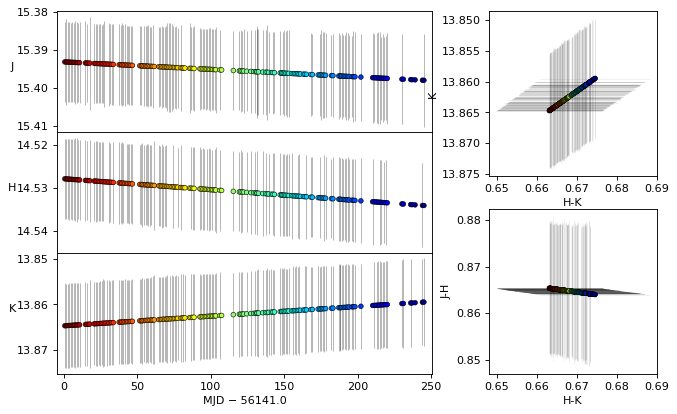

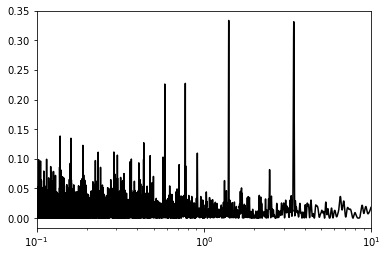

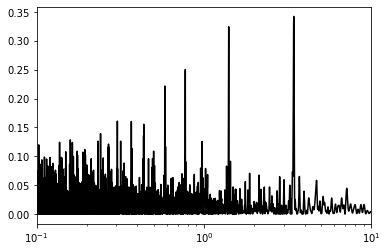

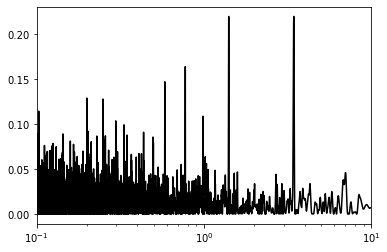





****************************************************************************
34 44508746116314

J period: 0.06
H period: 4.13
K period: 4.14


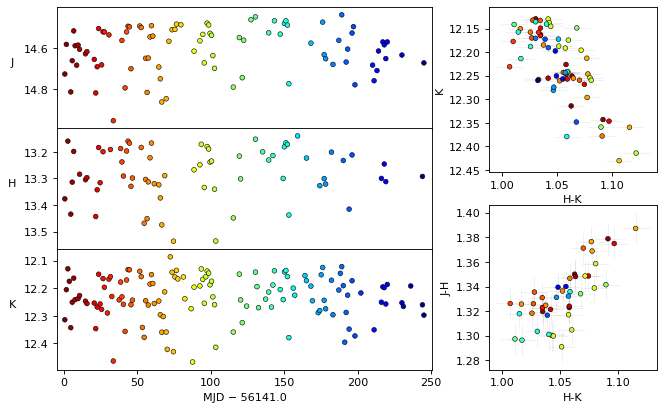

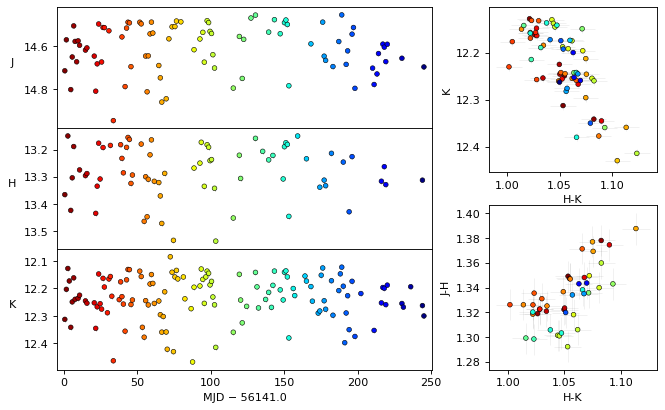

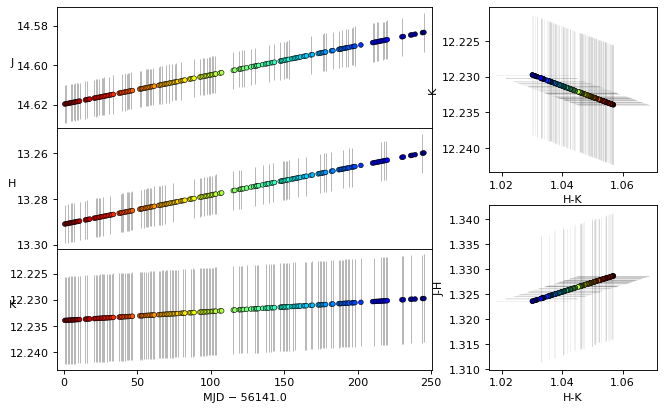

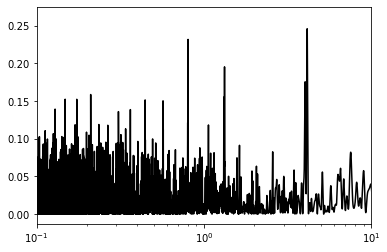

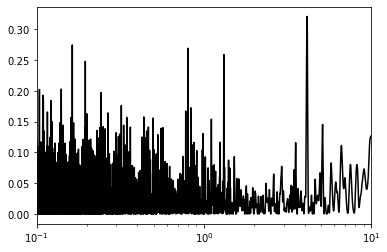

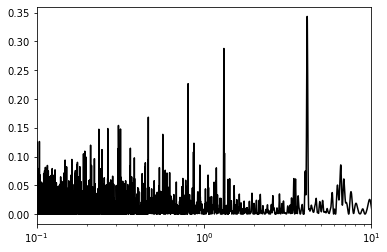





****************************************************************************
55 44508746116731

J period: 1.01
H period: 4.38
K period: 4.38


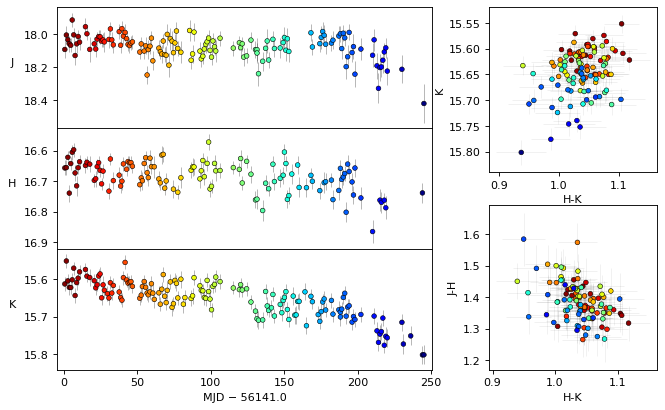

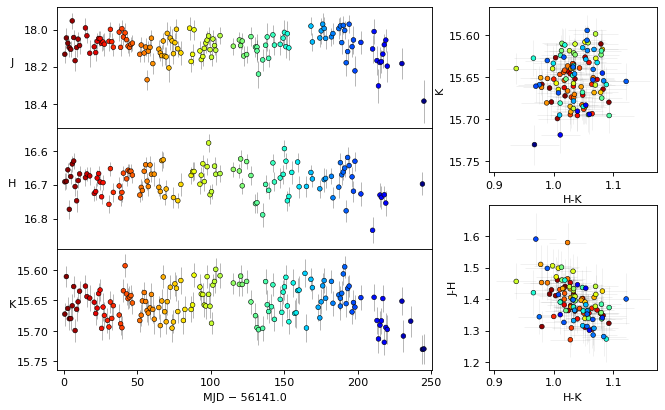

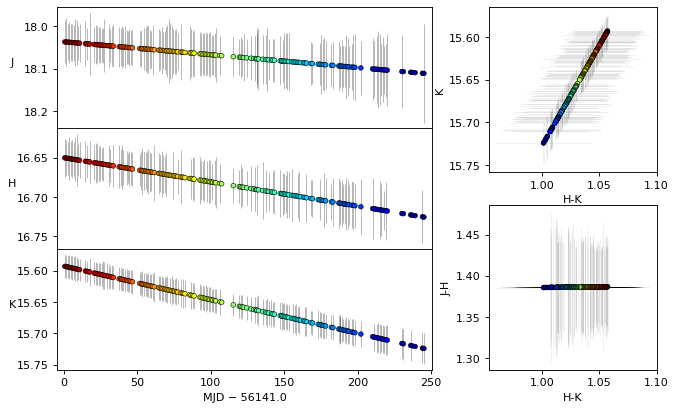

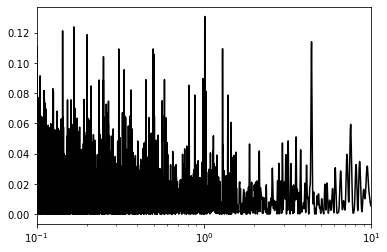

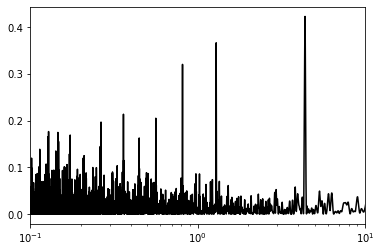

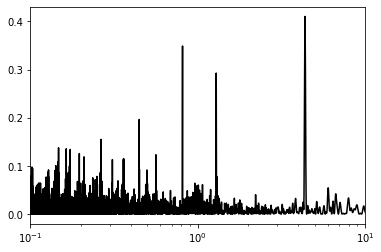





****************************************************************************
60 44508746116800

J period: 25.51
H period: 27.25
K period: 26.45


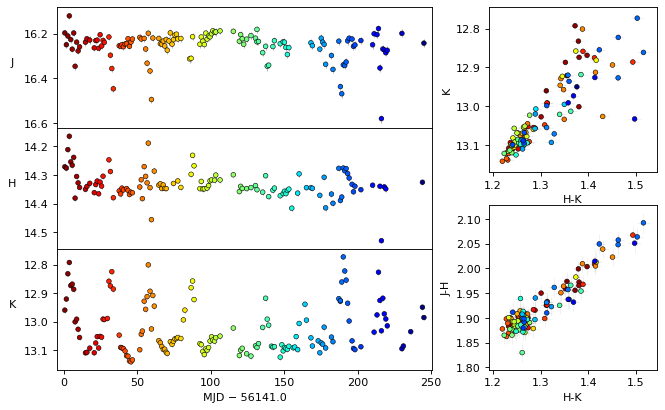

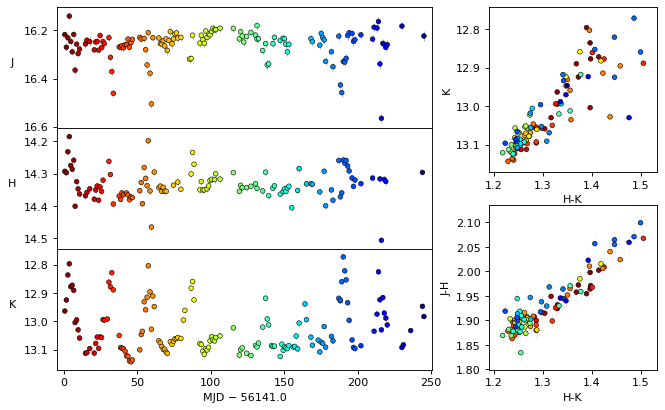

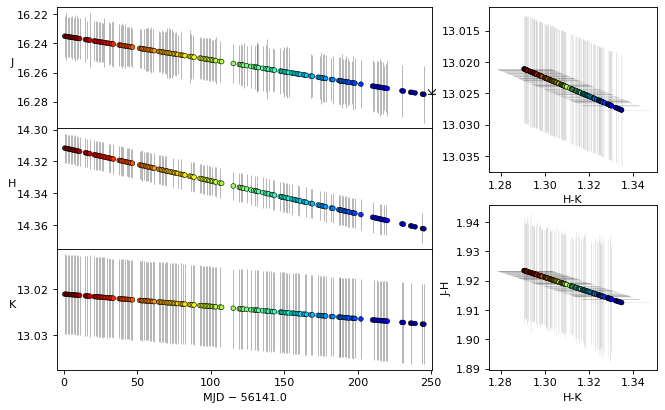

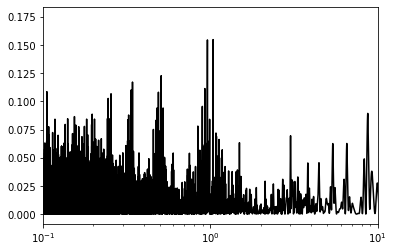

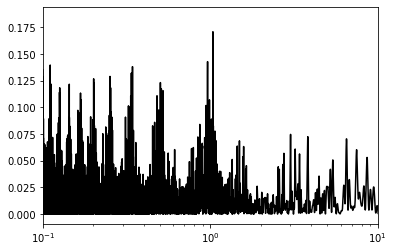

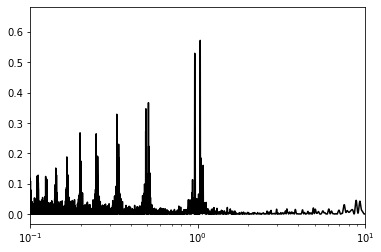





****************************************************************************
68 44508746116914

J period: 2.23
H period: 2.23
K period: 2.23


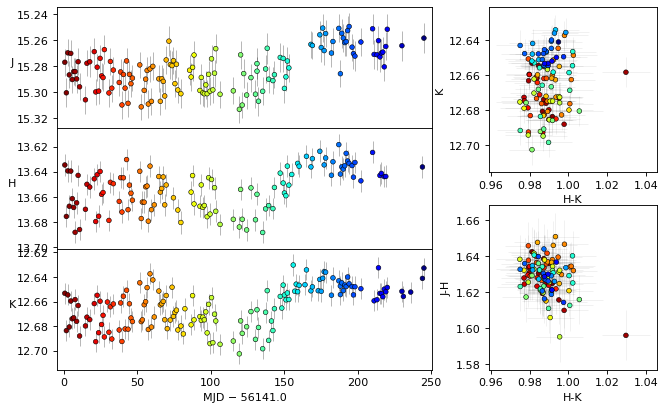

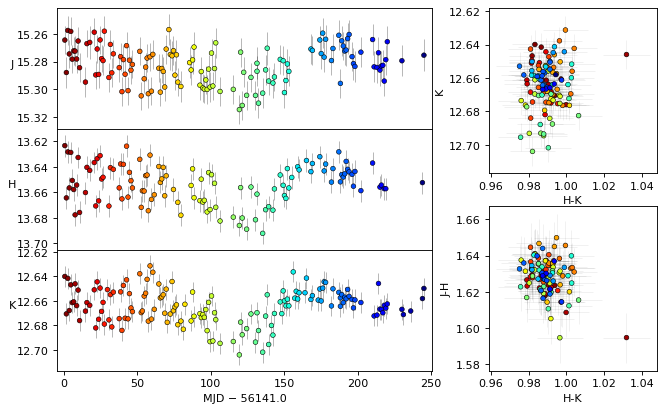

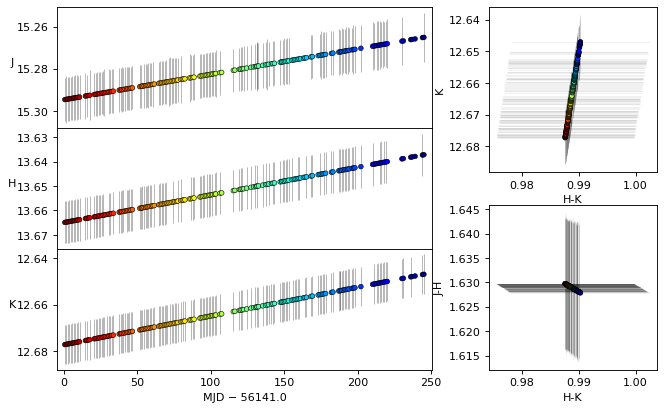

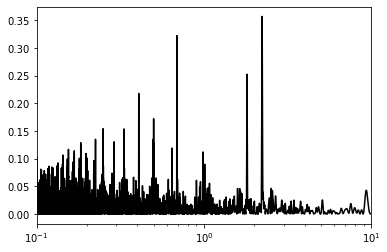

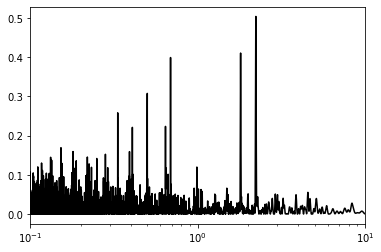

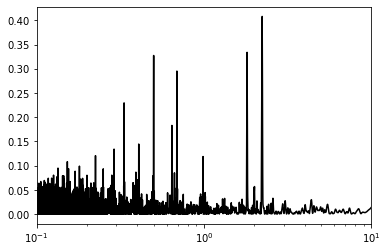





****************************************************************************
72 44508746116994

J period: 2.44
H period: 2.44
K period: 2.44


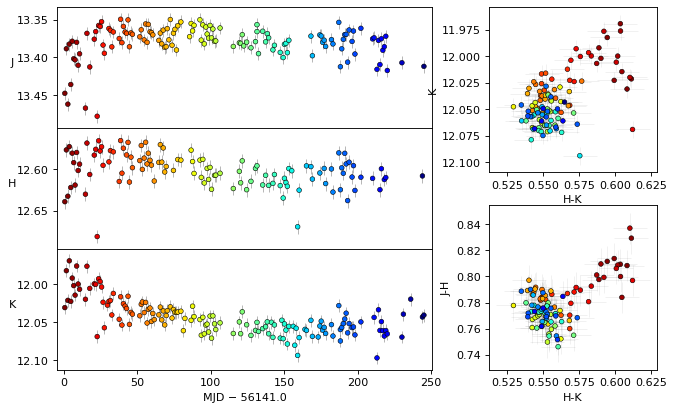

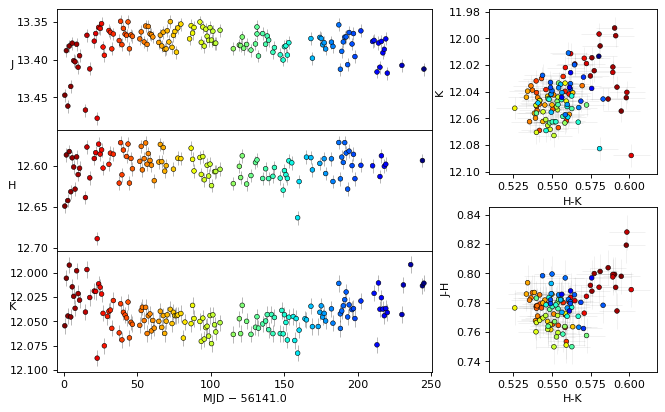

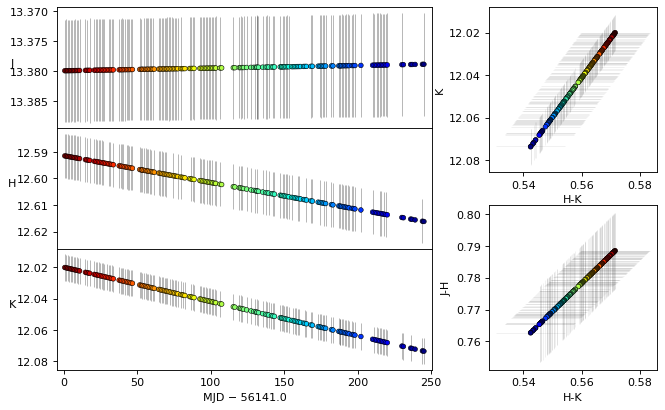

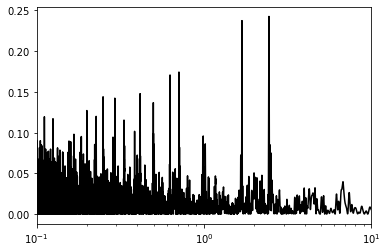

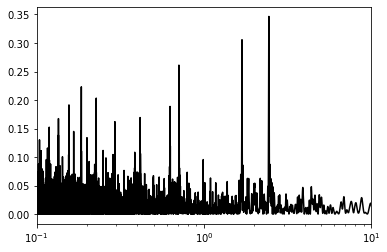

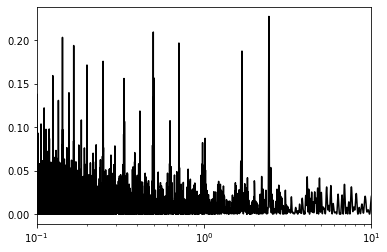





****************************************************************************
73 44508746116999

J period: 1.46
H period: 3.16
K period: 1.46


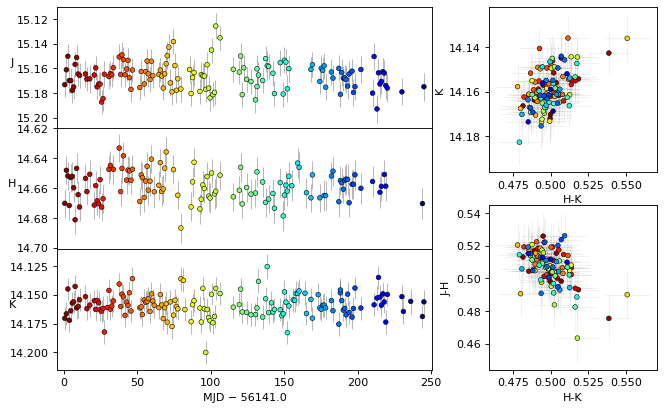

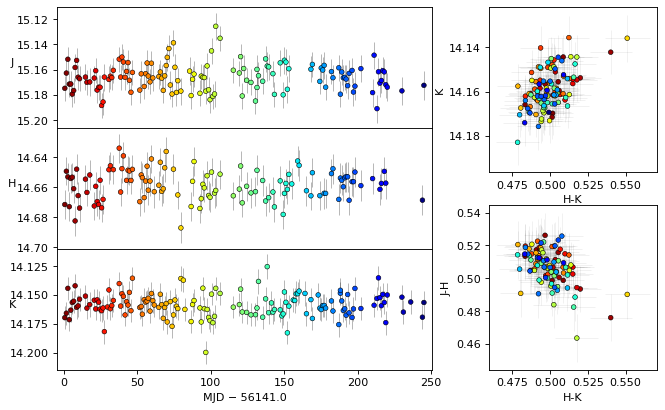

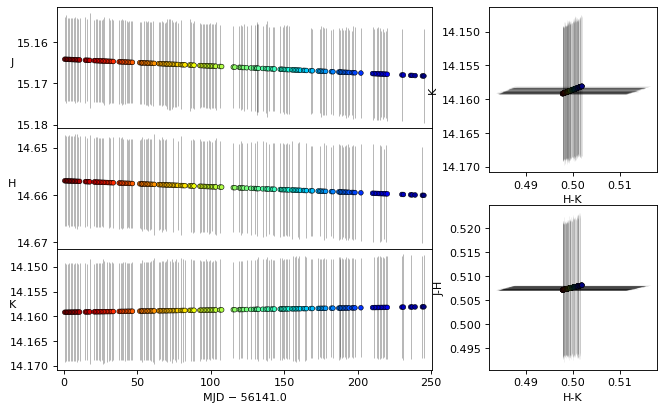

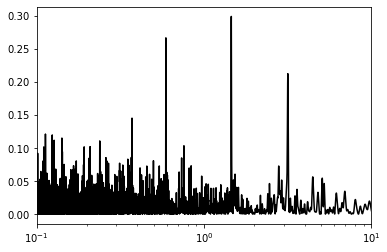

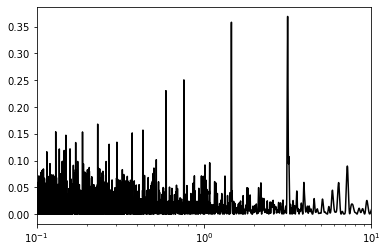

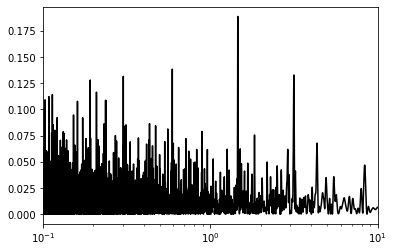





****************************************************************************
82 44508746117406

J period: 5.29
H period: 5.29
K period: 5.28


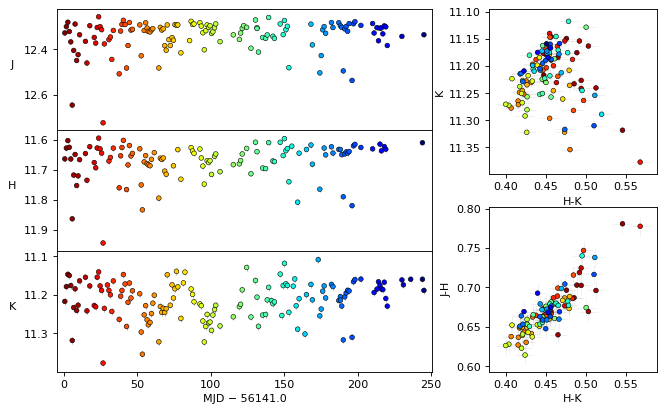

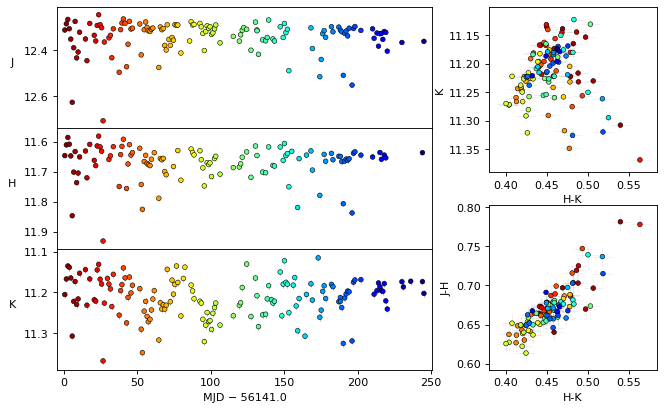

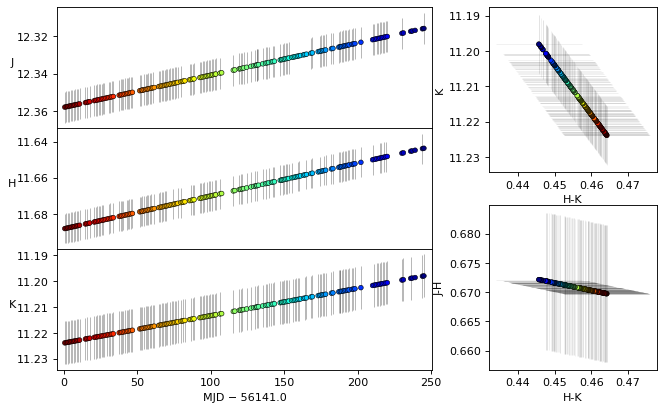

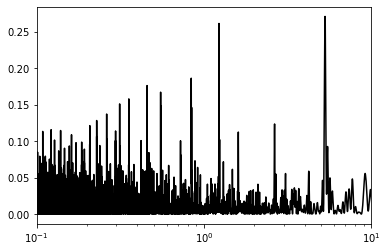

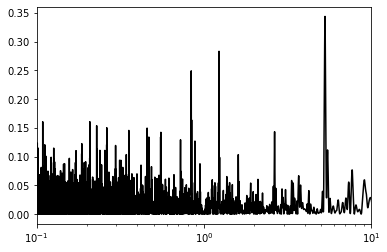

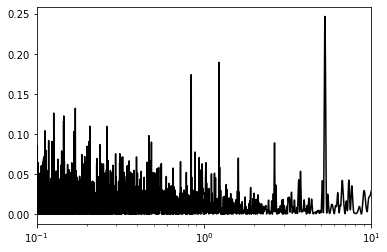





****************************************************************************
85 44508746117427

J period: 0.77
H period: 0.77
K period: 0.43


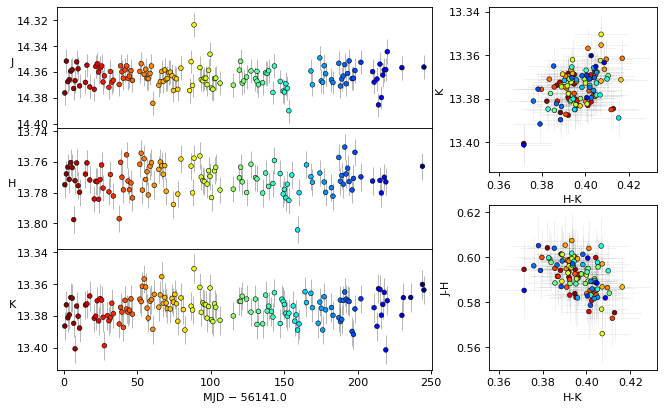

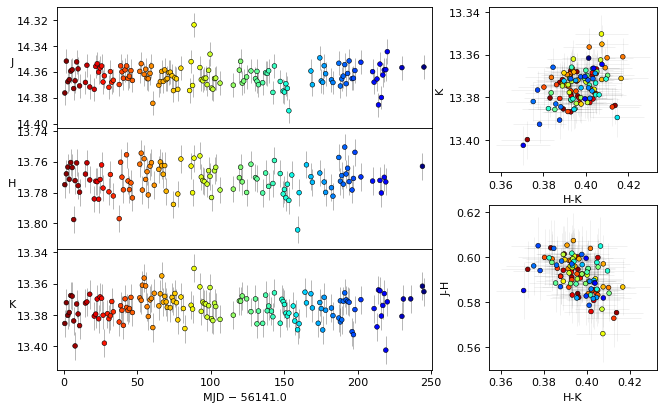

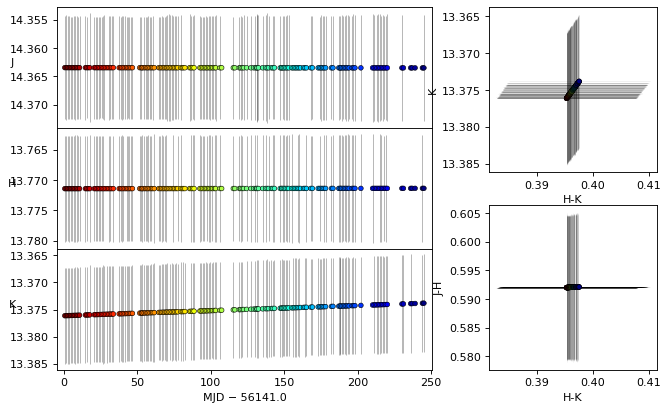

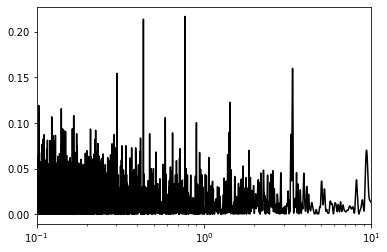

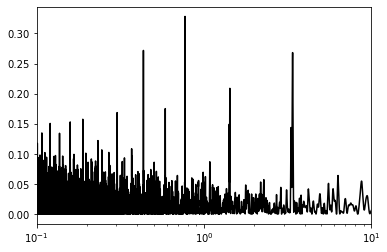

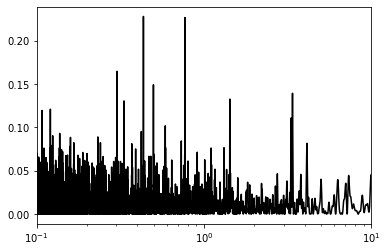





****************************************************************************
92 44508746117569

J period: 3.66
H period: 3.66
K period: 3.66


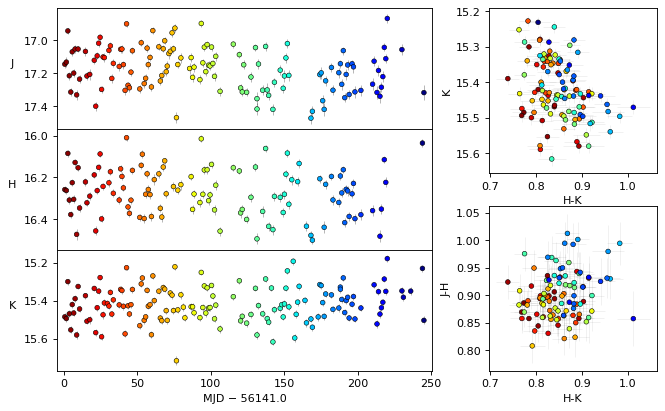

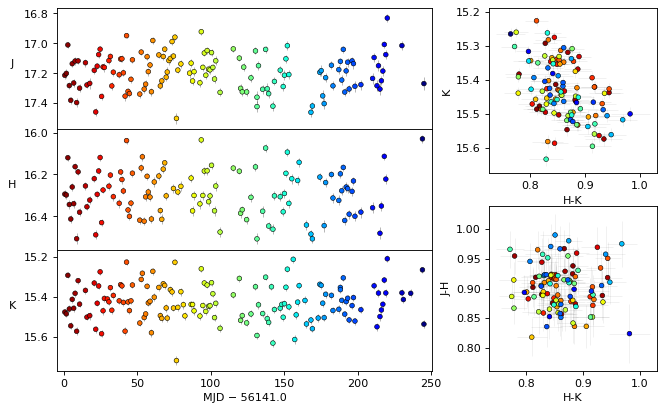

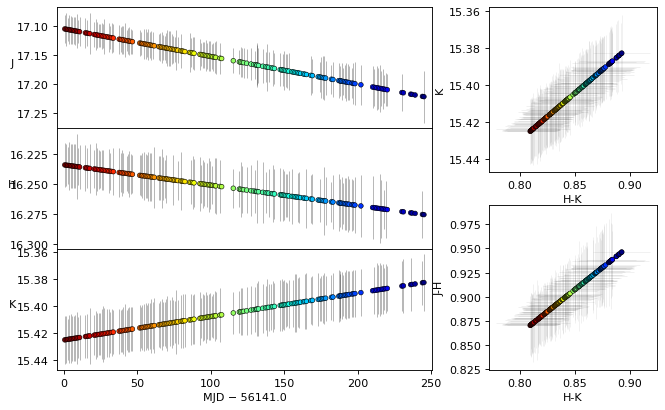

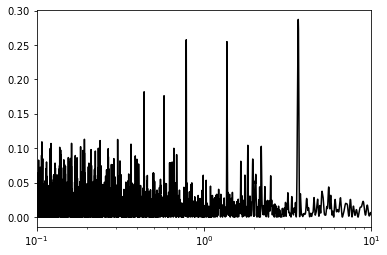

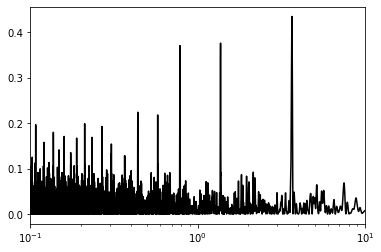

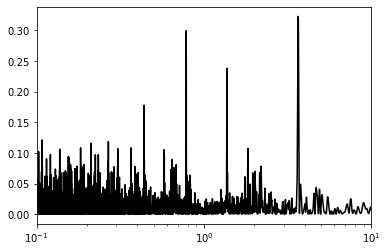





****************************************************************************
93 44508746117584

J period: 2.51
H period: 2.52
K period: 2.51


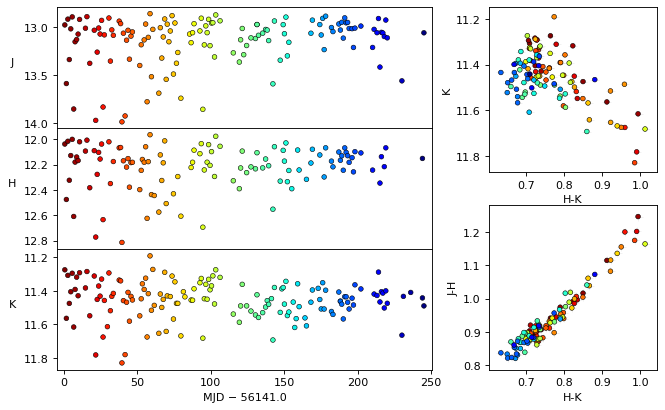

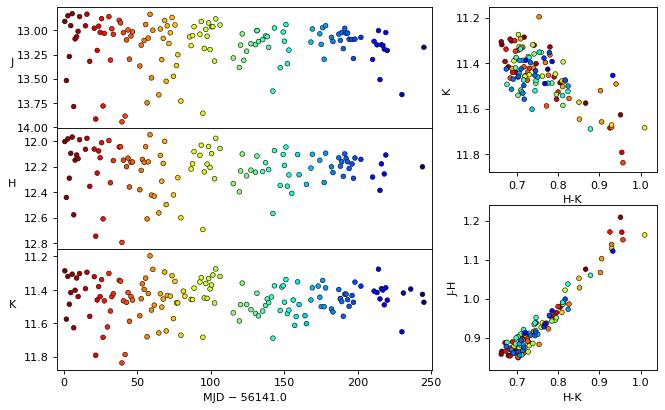

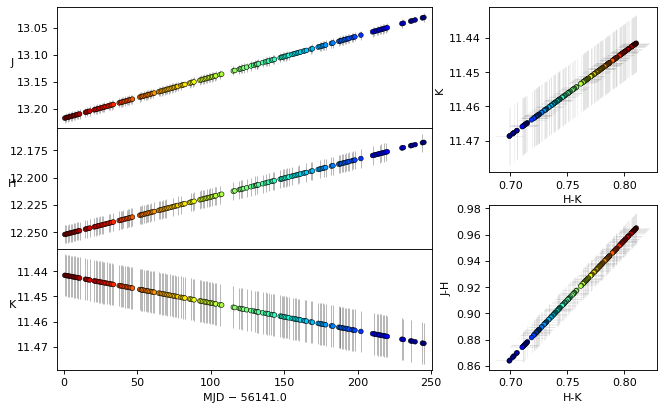

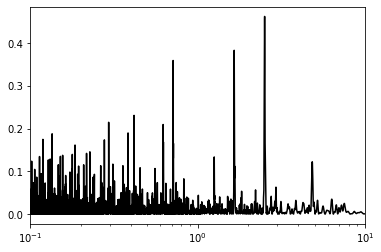

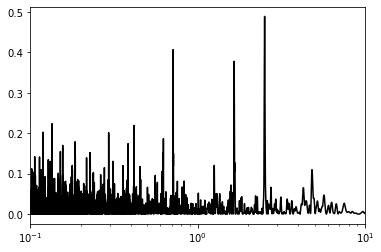

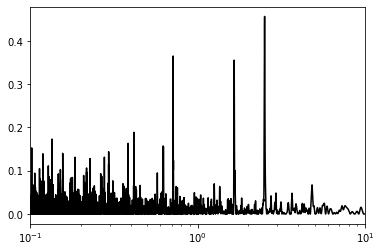





****************************************************************************


In [15]:
for index, row in followup_ngc.iterrows():
    print(row['index'], row['SOURCEID'])
    print('')
    visualize_detrending(row['SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[])
    plt.show()
    
    print('\n\n\n')
    print('*'*76)

In [11]:
type(followup_ngc)

pandas.core.frame.DataFrame

J period: 0.08
H period: 13.68
K period: 3.55


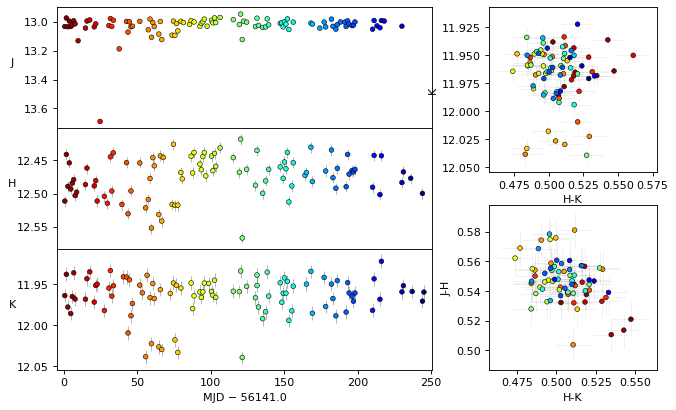

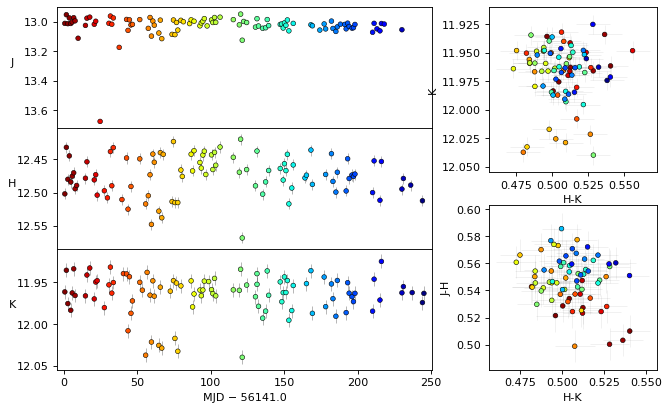

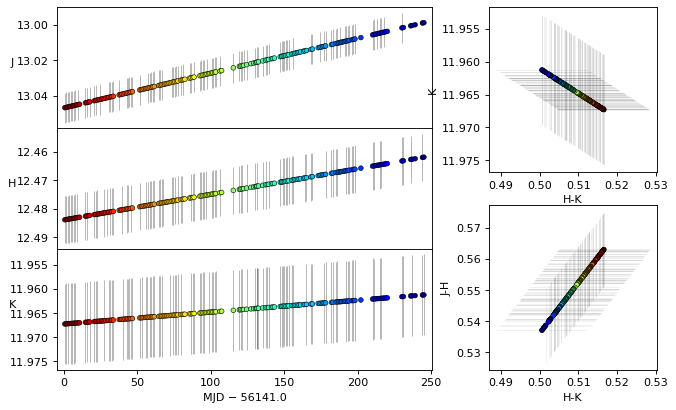

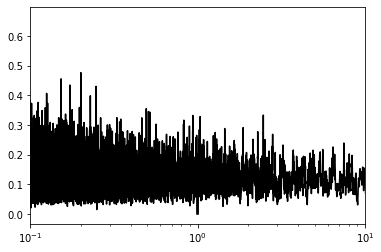

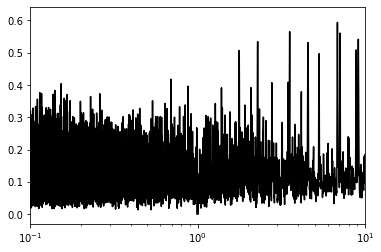

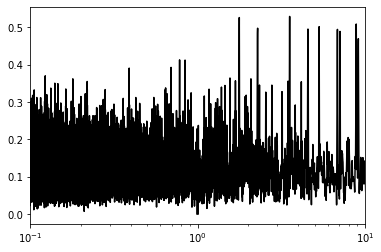

In [34]:
visualize_detrending(followup_ngc.loc[19,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], nterms=6)


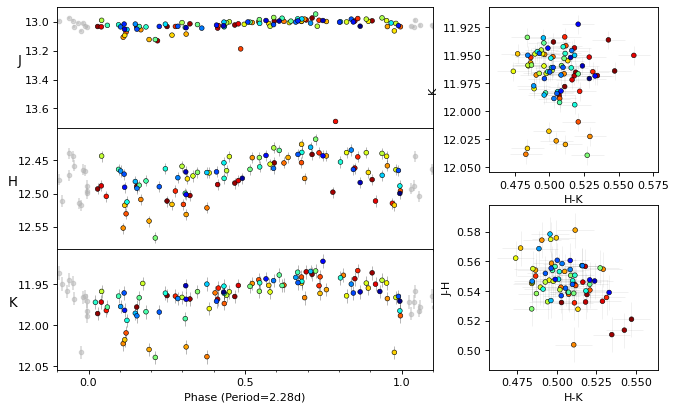

In [39]:
fig = simple_phased_lc_scatter_gridspec(
    ngc_dat, followup_ngc.loc[19,'SOURCEID'], 2.28257437419158, cmap='jet_r'
)


J period: 4.13
H period: 8.26
K period: 8.27


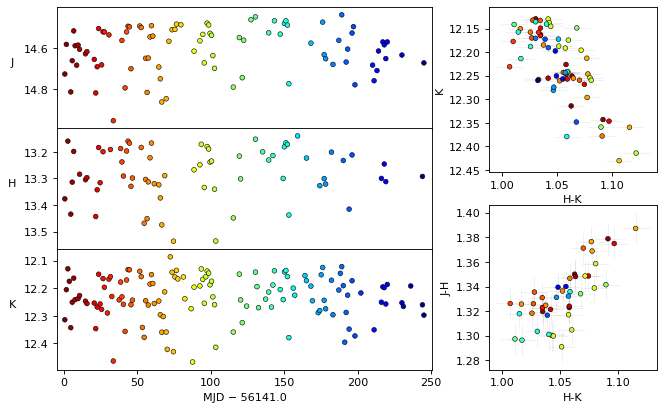

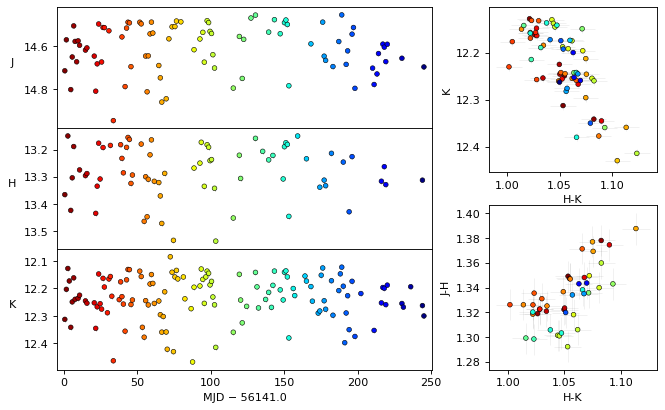

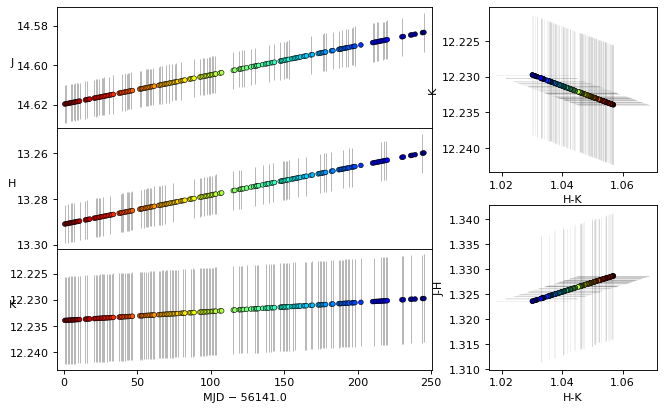

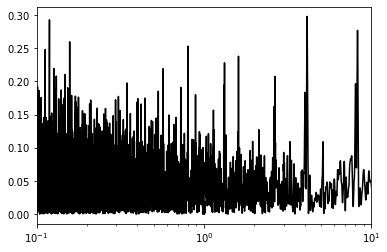

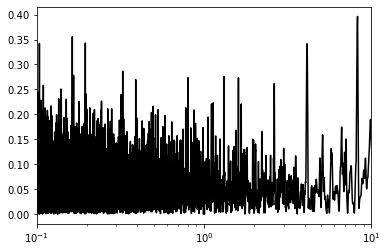

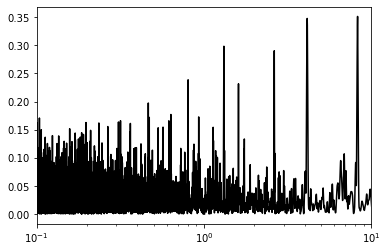

In [40]:
visualize_detrending(followup_ngc.loc[34,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], nterms=2)


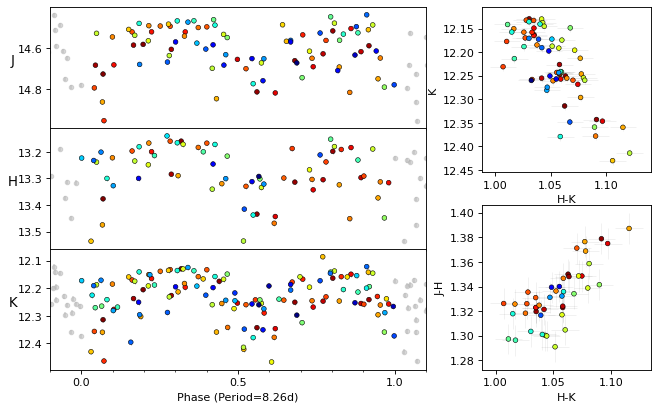

In [41]:
fig = simple_phased_lc_scatter_gridspec(
    ngc_dat, followup_ngc.loc[34,'SOURCEID'], 8.26, cmap='jet_r'
)


J period: 26.1096
H period: 0.3323
K period: 26.4549


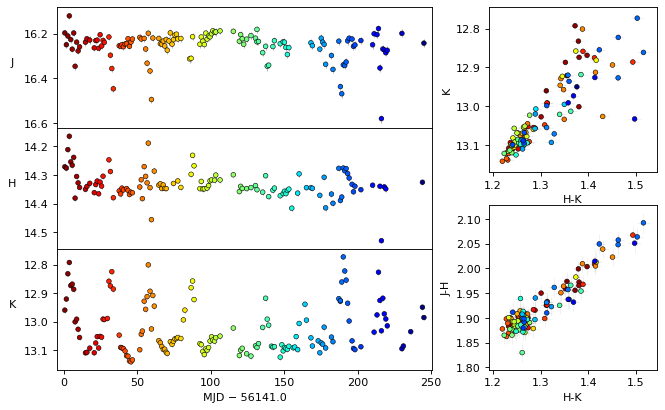

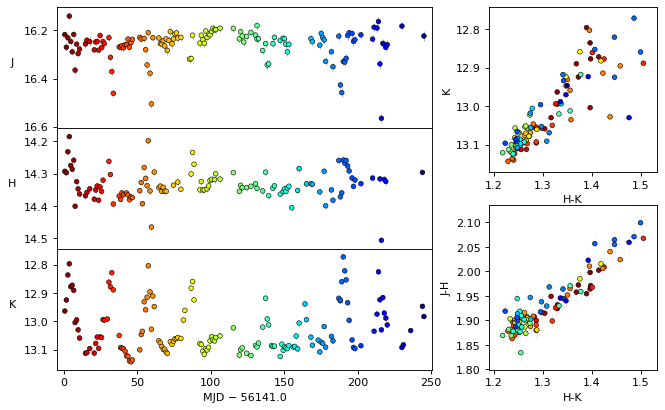

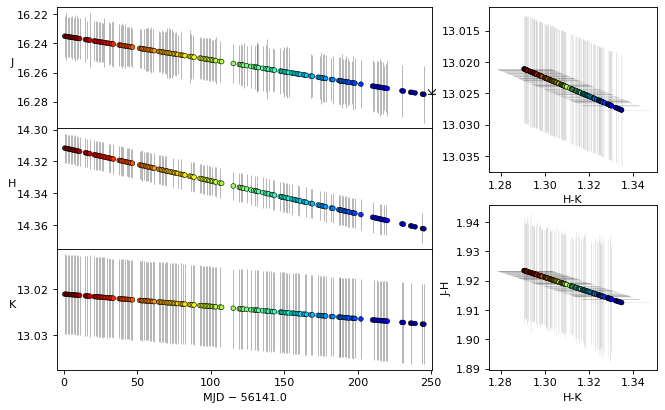

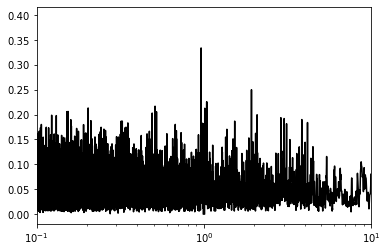

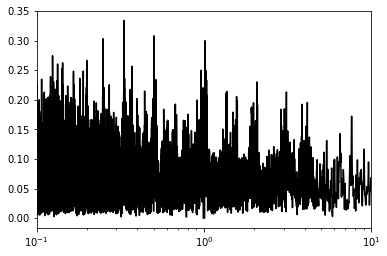

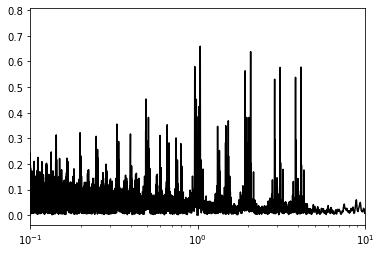

In [44]:
visualize_detrending(followup_ngc.loc[60,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], nterms=4)


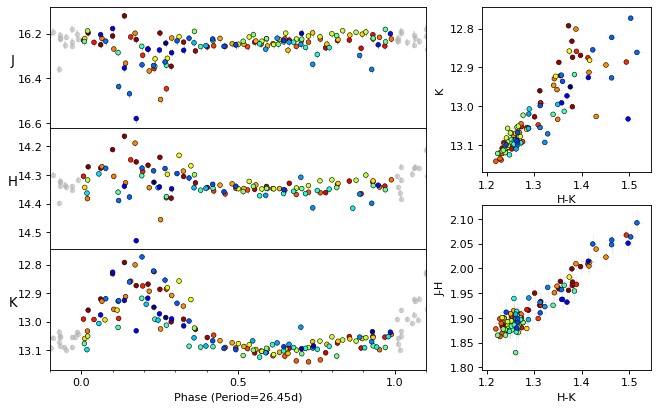

In [45]:
fig = simple_phased_lc_scatter_gridspec(
    ngc_dat, followup_ngc.loc[60,'SOURCEID'], 26.4549, cmap='jet_r'
)


J period: 2.2272
J amp: 0.010
H period: 2.2287
H amp: 0.014
K period: 2.2272
K amp: 0.012


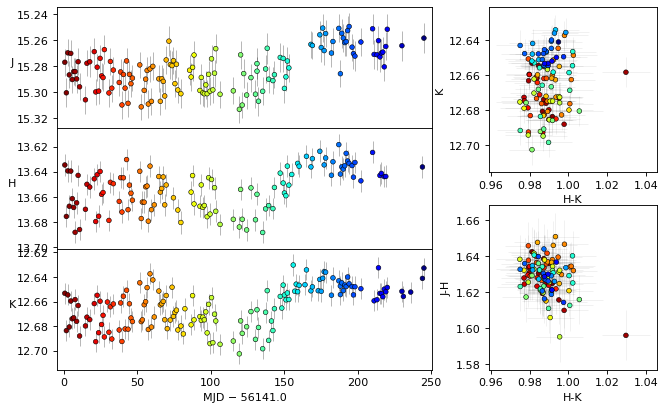

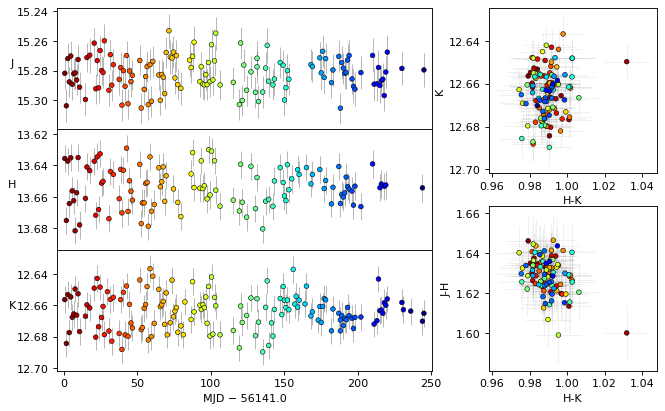

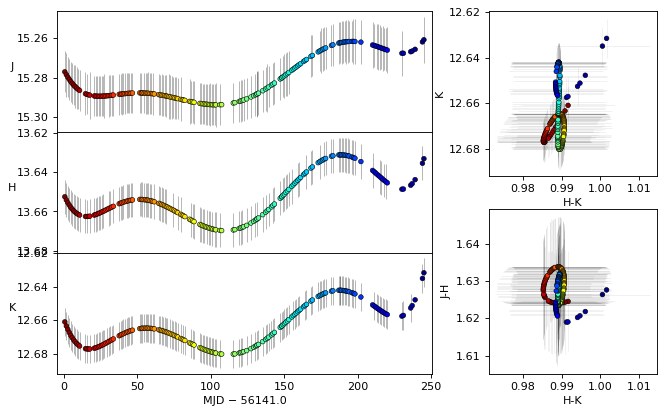

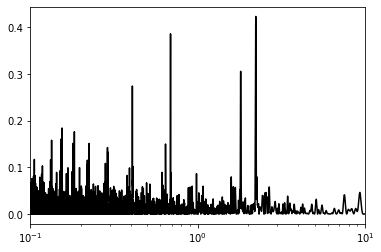

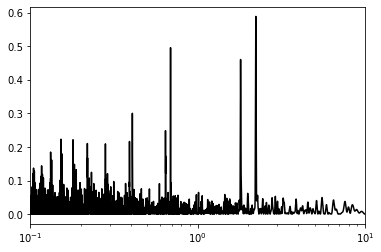

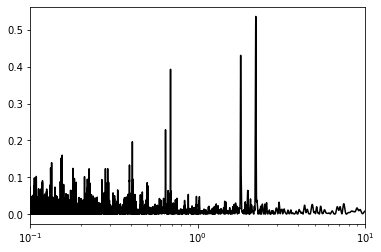

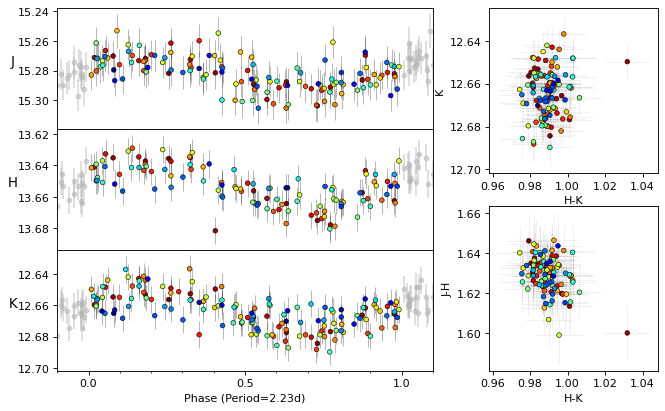

In [60]:
visualize_detrending(followup_ngc.loc[68,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], poly_order=6, plot_phase=True)


J period: 2.4444
J amp: 0.015
H period: 2.4426
H amp: 0.016
K period: 2.4438
K amp: 0.012


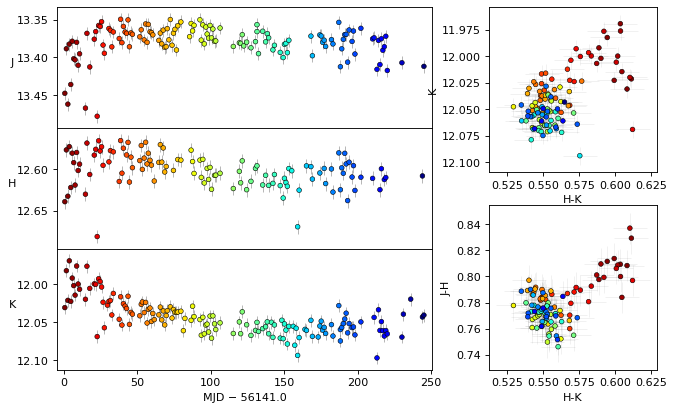

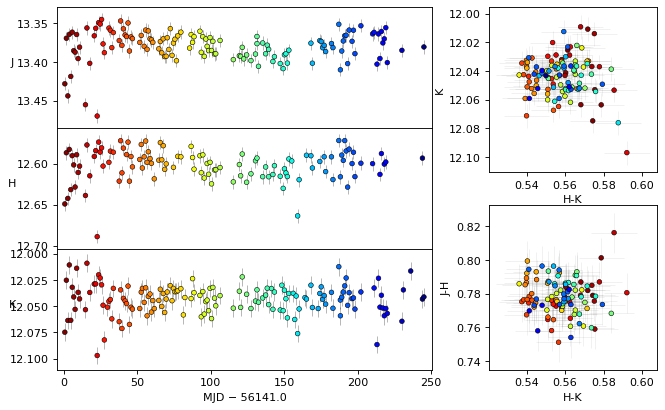

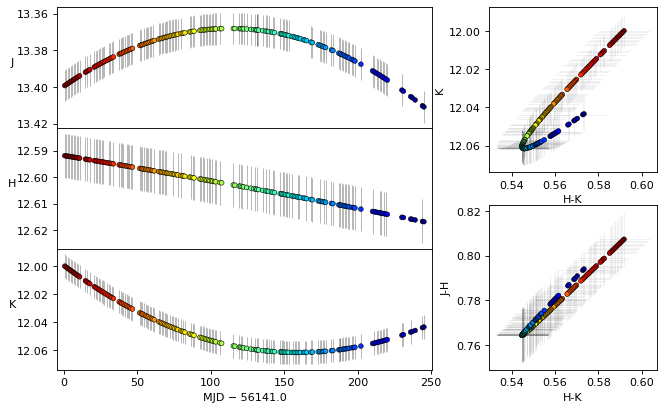

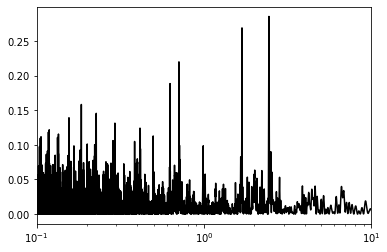

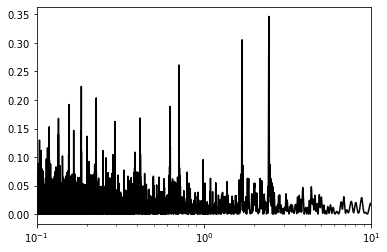

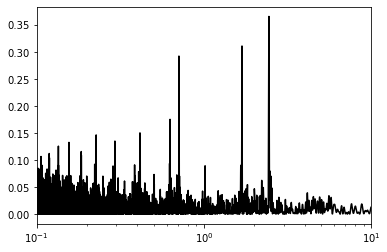

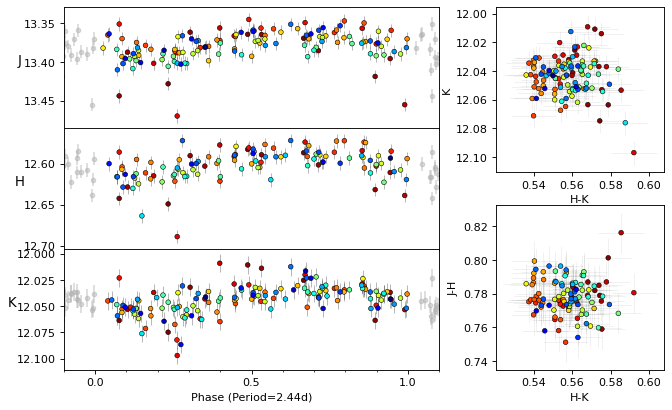

In [62]:
visualize_detrending(followup_ngc.loc[72,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], poly_order=2, plot_phase=True)


J period: 5.2826
J amp: 0.051
H period: 5.2826
H amp: 0.047
K period: 5.2826
K amp: 0.032


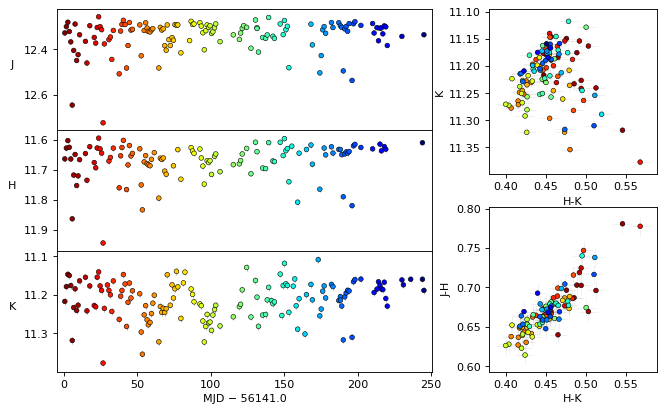

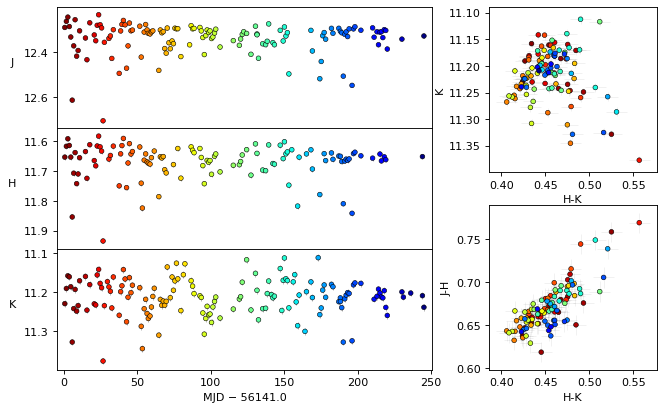

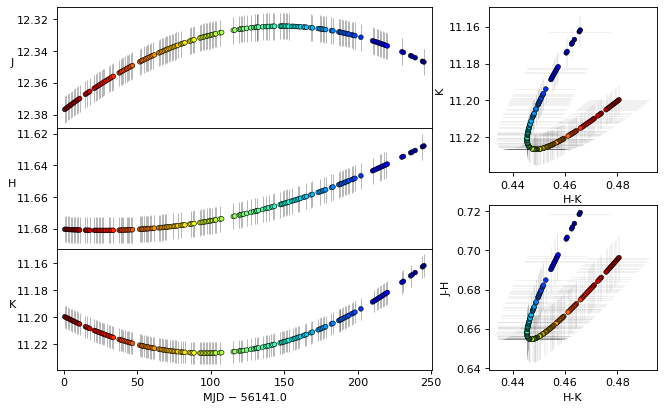

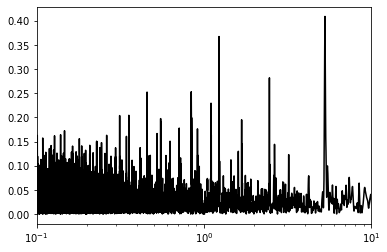

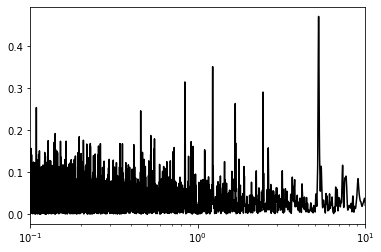

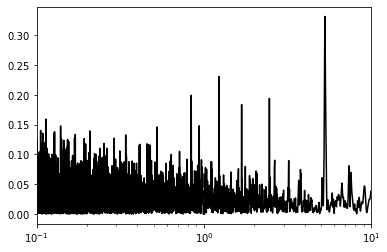

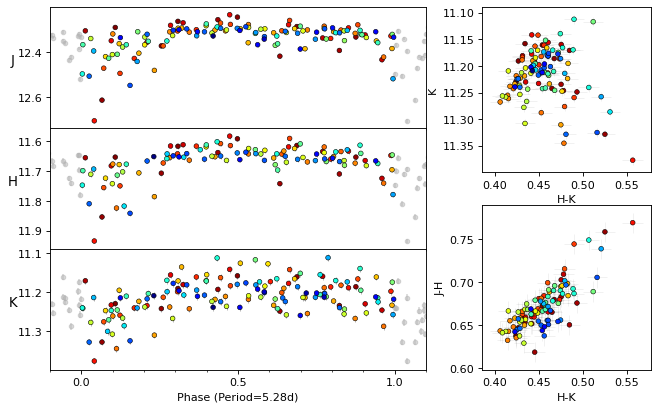

In [63]:
visualize_detrending(followup_ngc.loc[82,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], poly_order=2, plot_phase=True, nterms=2)


J period: 3.6576
J amp: 0.089
H period: 3.6616
H amp: 0.099
K period: 3.6563
K amp: 0.070


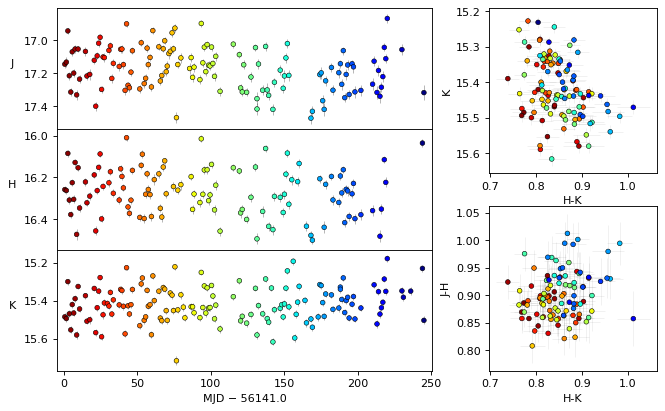

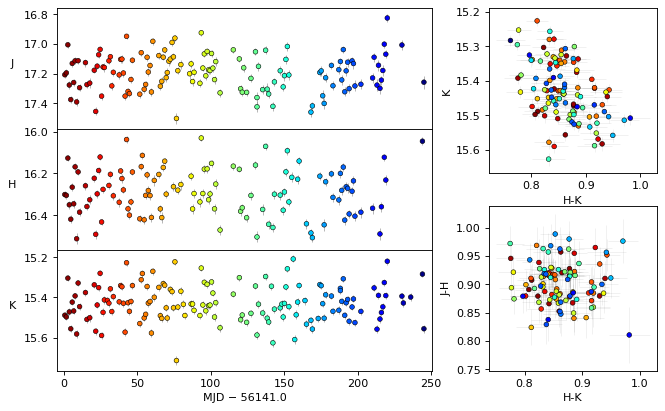

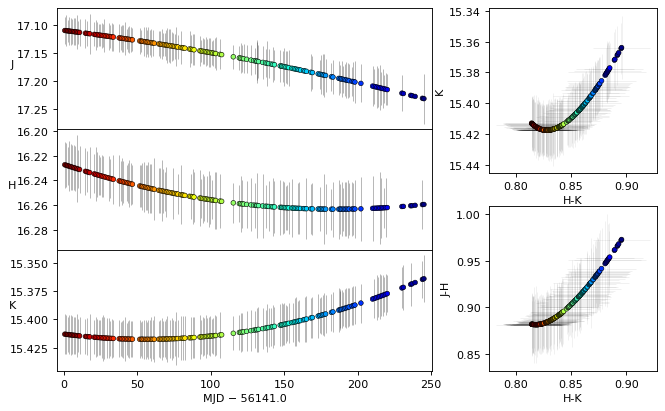

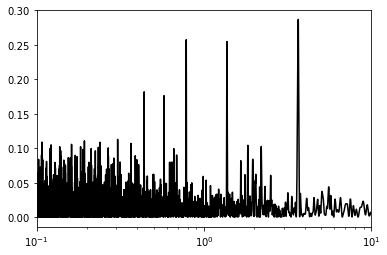

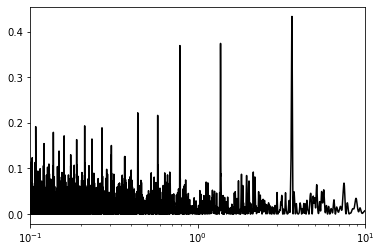

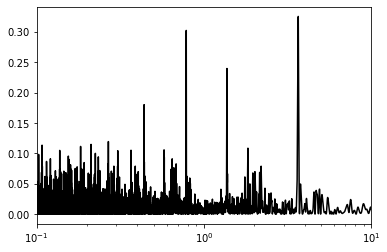

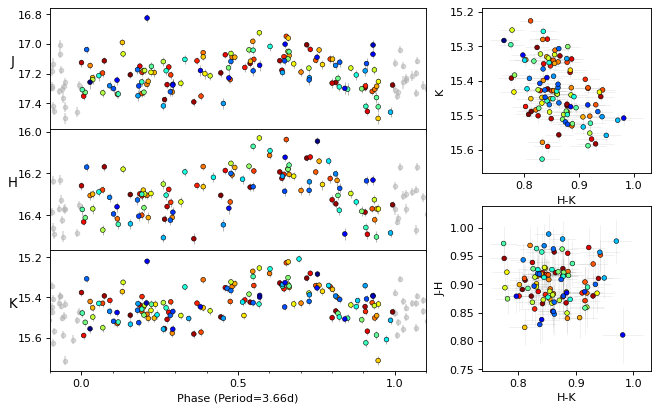

In [64]:
visualize_detrending(followup_ngc.loc[92,'SOURCEID'], ngc_dat, ngc_date_offset, simple_breaks=[], poly_order=2, plot_phase=True,)
